## Importing Necessary Libraries


In [174]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import io
import sys
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift, estimate_bandwidth

## Importing the Training Dataset

In [2]:
train_set = pd.read_excel("seeds_dataset_Randomized_for_HW.xlsx")

## Preliminary Data Description

In [3]:
train_set.head()   # Preliminary display of data set

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Length of kerenel groove,Class
0,14.43,14.40,0.8751,5.585,3.272,3.975,5.144,1
1,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,2
2,12.76,13.38,0.8964,5.073,3.155,2.828,4.830,3
3,12.11,13.47,0.8392,5.159,3.032,1.502,4.519,1
4,12.05,13.41,0.8416,5.267,2.847,4.988,5.046,3


In [4]:
train_set.describe()  # Summary statistics of data set

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Length of kerenel groove,Class
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,14.868485,14.568939,0.871062,5.632374,3.261237,3.659748,5.411753,1.994949
std,2.912254,1.307944,0.023719,0.444037,0.378294,1.492139,0.490131,0.815444
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.230000,13.450000,0.856900,5.253000,2.944000,2.472500,5.045250,1.000000
50%,14.405000,14.380000,0.873100,5.534000,3.243500,3.597500,5.223000,2.000000
75%,17.305000,15.715000,0.887325,5.993500,3.561750,4.695750,5.878500,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [5]:
train_set.info()  # Checks for data types contained within each colum and assesses completeness

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area                      198 non-null    float64
 1   Perimeter                 198 non-null    float64
 2   Compactness               198 non-null    float64
 3   Length                    198 non-null    float64
 4   Width                     198 non-null    float64
 5   Asymmetry                 198 non-null    float64
 6   Length of kerenel groove  198 non-null    float64
 7   Class                     198 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.5 KB


## Statistical Feature Selection

##### Data preparation visualisation

In [6]:
train_set_arrays = np.asarray(train_set) # Converting the training set into numpy array for visualisation
print(train_set_arrays)


[[14.43   14.4     0.8751 ...  3.975   5.144   1.    ]
 [18.95   16.42    0.8829 ...  3.368   6.148   2.    ]
 [12.76   13.38    0.8964 ...  2.828   4.83    3.    ]
 ...
 [12.62   13.67    0.8481 ...  3.306   5.231   3.    ]
 [11.83   13.23    0.8496 ...  5.195   5.307   3.    ]
 [17.36   15.76    0.8785 ...  3.526   5.971   2.    ]]


In [7]:
# Assigning variables to the column of the numpy area
train_area=train_set_arrays[:,0]
train_perimeter=train_set_arrays[:,1]
train_compaction=train_set_arrays[:,2]
train_length1=train_set_arrays[:,3]
train_width=train_set_arrays[:,4]
train_asymmetry=train_set_arrays[:,5]
train_length2=train_set_arrays[:,6]
train_label=train_set_arrays[:,7]

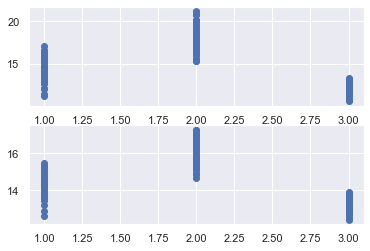

In [8]:
fig, ab = plt.subplots(2)

ab[0].plot(train_label,train_area, "o")
ab[1].plot(train_label,train_perimeter, "o")

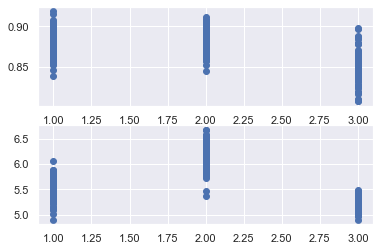

In [9]:
fig, cd = plt.subplots(2)

cd[0].plot(train_label,train_compaction, "o")
cd[1].plot(train_label,train_length1, "o");

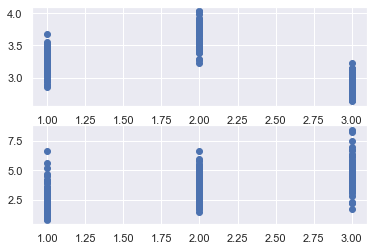

In [10]:
fig, ef = plt.subplots(2)

ef[0].plot(train_label,train_width, "o")
ef[1].plot(train_label,train_asymmetry, "o");


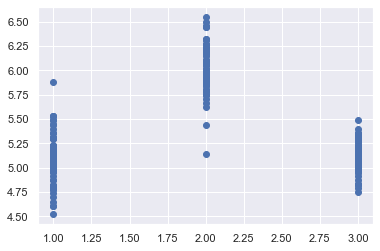

In [11]:
fig, g = plt.subplots()

g.plot(train_label,train_length2, "o");

### Using Pearson's corelation coefficient

In [12]:

area = np.corrcoef(train_label,train_area)

perimeter = np.corrcoef(train_label,train_perimeter)

compaction = np.corrcoef(train_label,train_compaction)

length1 = np.corrcoef(train_label,train_length1, "o")

width = np.corrcoef(train_label,train_width)

asymmetry = np.corrcoef(train_label, train_asymmetry)

length2 = np.corrcoef(train_label, train_length2)

In [13]:
# Printing the correlation coefficient for each of the feature against the labels

print(area)
print(perimeter)
print(compaction)
print(length1)
print(width)
print(asymmetry)
print(length2)

[[ 1.         -0.35102688]
 [-0.35102688  1.        ]]
[[ 1.         -0.33554134]
 [-0.33554134  1.        ]]
[[ 1.         -0.51740061]
 [-0.51740061  1.        ]]
[[ 1.         -0.26568481]
 [-0.26568481  1.        ]]
[[ 1.         -0.42599539]
 [-0.42599539  1.        ]]
[[1.         0.56680018]
 [0.56680018 1.        ]]
[[1.         0.00959859]
 [0.00959859 1.        ]]


###### From the values of the correlation coefficient, the correlation between area and the labels and perimeter against the labels are approximately equal. Therefore, the perimeter feature was excluded to avoid feature redundancy 

### Feature scaling was carried out on scale using the mean nomalisation methods

In [14]:
scaled_train_set = pd.read_excel("Normalised_dataset_Randomised_for_HW.xlsx")  # Loading the scaled features

In [15]:
scaled_train_set.head()   # Preliminary display of data set

,Normalised Area,Normalised Compaction,Normalised Length,Normalised Width,Normalised Asymmetry,Normalised Length of kerenel groove
0,-0.150566,0.170243,-0.106689,0.028451,0.211275,-0.546289
1,1.401497,0.499094,1.386423,1.305236,-0.195523,1.502143
2,-0.724004,1.068258,-1.259741,-0.280832,-0.557420,-1.186934
3,-0.947199,-1.343311,-1.066064,-0.605976,-1.446077,-1.821458
4,-0.967802,-1.242127,-0.822842,-1.095013,0.890166,-0.746235


In [16]:
scaled_train_set.describe()  # Summary statistics of data set

,Normalised Area,Normalised Compaction,Normalised Length,Normalised Width,Normalised Asymmetry,Normalised Length of kerenel groove
count,1.980000e+02,198.000000,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02
mean,-5.202676e-08,-0.000016,-5.914486e-07,9.879548e-07,3.249352e-07,-9.686134e-07
std,1.000000e+00,0.999999,9.999960e-01,9.999995e-01,1.000000e+00,9.999994e-01
min,-1.469132e+00,-2.654496,-1.651598e+00,-1.668641e+00,-1.939932e+00,-1.821458e+00
25%,-9.059941e-01,-0.597074,-8.543709e-01,-8.385991e-01,-7.956685e-01,-7.477654e-01
50%,-1.591499e-01,0.085923,-2.215436e-01,-4.688681e-02,-4.171729e-02,-3.851072e-01
75%,8.366423e-01,0.685653,8.132754e-01,7.943901e-01,6.943066e-01,9.522903e-01
max,2.167227e+00,1.991568,2.348051e+00,2.040114e+00,3.214347e+00,2.322332e+00


## KMEANS CLUSTERING

### Determining the Number of Clusters Using the Elbow Method

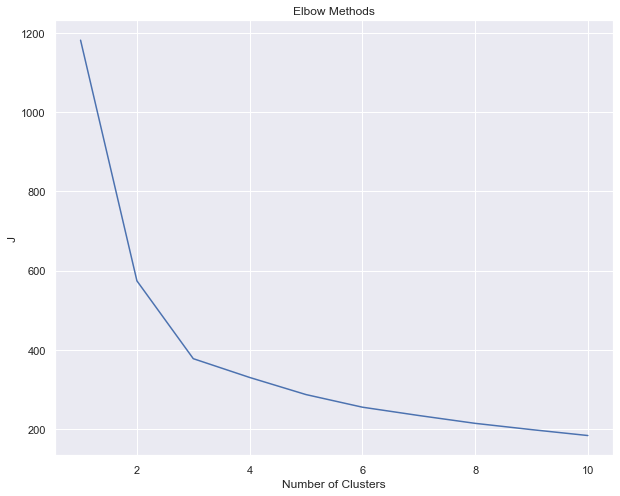

In [17]:
plt.rcParams["figure.figsize"]=(10,8)

N = []
import os
os.environ["OMP_NUM_THREADS"] = '1'
for _ in range(1,11):
    kmeans = KMeans(n_clusters=_,
    init = "k-means++", max_iter=100, n_init=10)
    kmeans.fit(scaled_train_set)
    N.append(kmeans.inertia_)
    
plt.plot(range(1,11), N)
plt.title("Elbow Methods")
plt.xlabel("Number of Clusters")
plt.ylabel("J");


### Deploying the K Means ALgorithm 

In [18]:
def kmeans(a):
    
    # Function to deploy K means. Takes in a dataset "a", prints out the clusters centroids, cost function and returns the labels
    
    kmeans_set = KMeans(n_clusters=3)   # Initialises Kmeans using 3 clusters
    kmeans_set.fit(a)                   # fits the data into the initialised kmeans
    print(kmeans_set.cluster_centers_)  # Prints the centers of the three KMeans cluster centroids
    print(kmeans_set.inertia_)          # Prints the final cost function of after all iterations
    return kmeans_set.labels_           # returns the labels assigned to each training example

In [19]:
kmeans_scaled_train_set1 = kmeans(scaled_train_set)
kmeans_scaled_train_set1

[[-1.061794   -1.0739856  -0.89635836 -1.14555252  0.83276956 -0.59549721]
 [ 1.18087742  0.5203597   1.1818175   1.09142796 -0.04676335  1.23444777]
 [-0.24864548  0.3940491  -0.38702203 -0.09337052 -0.64723144 -0.68744091]]
377.81019252168403


array([2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 0, 1, 0, 2, 2, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1,
       2, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 2, 1, 2, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 2, 2, 2,
       0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 1, 2, 0, 1, 1, 0,
       2, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2,
       2, 2, 2, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 0, 2, 2, 1, 2, 0,
       2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 1])

In [20]:
kmeans_scaled_train_set2 = kmeans(scaled_train_set)
kmeans_scaled_train_set2

[[-1.061794   -1.0739856  -0.89635836 -1.14555252  0.83276956 -0.59549721]
 [ 1.18087742  0.5203597   1.1818175   1.09142796 -0.04676335  1.23444777]
 [-0.24864548  0.3940491  -0.38702203 -0.09337052 -0.64723144 -0.68744091]]
377.81019252168403


array([2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 0, 1, 0, 2, 2, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1,
       2, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 2, 1, 2, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 2, 2, 2,
       0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 1, 2, 0, 1, 1, 0,
       2, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2,
       2, 2, 2, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 0, 2, 2, 1, 2, 0,
       2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 1])

In [21]:
kmeans_scaled_train_set3 = kmeans(scaled_train_set)
kmeans_scaled_train_set3

[[-1.061794   -1.0739856  -0.89635836 -1.14555252  0.83276956 -0.59549721]
 [ 1.18087742  0.5203597   1.1818175   1.09142796 -0.04676335  1.23444777]
 [-0.24864548  0.3940491  -0.38702203 -0.09337052 -0.64723144 -0.68744091]]
377.81019252168403


array([2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 0, 1, 0, 2, 2, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1,
       2, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 2, 1, 2, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 2, 2, 2,
       0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 1, 2, 0, 1, 1, 0,
       2, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2,
       2, 2, 2, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 0, 2, 2, 1, 2, 0,
       2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 1])

In [22]:
kmeans_scaled_train_set4 = kmeans(scaled_train_set)
kmeans_scaled_train_set4

[[-1.061794   -1.0739856  -0.89635836 -1.14555252  0.83276956 -0.59549721]
 [ 1.18087742  0.5203597   1.1818175   1.09142796 -0.04676335  1.23444777]
 [-0.24864548  0.3940491  -0.38702203 -0.09337052 -0.64723144 -0.68744091]]
377.81019252168403


array([2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 0, 1, 0, 2, 2, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1,
       2, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 2, 1, 2, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 2, 2, 2,
       0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 1, 2, 0, 1, 1, 0,
       2, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2,
       2, 2, 2, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 0, 2, 2, 1, 2, 0,
       2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 1])

In [23]:
kmeans_scaled_train_set5 = kmeans(scaled_train_set)
kmeans_scaled_train_set5

[[-0.24864548  0.3940491  -0.38702203 -0.09337052 -0.64723144 -0.68744091]
 [ 1.18087742  0.5203597   1.1818175   1.09142796 -0.04676335  1.23444777]
 [-1.061794   -1.0739856  -0.89635836 -1.14555252  0.83276956 -0.59549721]]
377.81019252168403


array([0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 1, 1,
       1, 2, 0, 2, 1, 2, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       2, 2, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 2, 0, 2, 1, 1, 1, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 1, 2, 0, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 0, 0, 0,
       2, 2, 0, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 2, 1, 1, 2,
       0, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0,
       0, 0, 0, 2, 2, 0, 1, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 0, 0, 1, 0, 2,
       0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1])

### Evaluation of the Optimisation Objectives

In [24]:
# Function to display the cost fucntion for every iteration

def ite_inertia(X):
    kmeans_scaled_train_set = KMeans(n_clusters=3,verbose=2, n_init=1)
    kmeans_scaled_train_set.fit(X)
    return kmeans_scaled_train_set

ite_inertia(scaled_train_set)


Initialization complete
Iteration 0, inertia 603.9480019176258
Iteration 1, inertia 426.66697090004476
Iteration 2, inertia 397.61380143190337
Iteration 3, inertia 384.3311316874144
Iteration 4, inertia 381.91866596008464
Iteration 5, inertia 380.98683699677673
Iteration 6, inertia 379.9265813519177
Iteration 7, inertia 379.4571217924722
Iteration 8, inertia 378.9191932072933
Iteration 9, inertia 378.3931131528621
Iteration 10, inertia 377.9559694672671
Iteration 11, inertia 377.8231648531797
Converged at iteration 11: strict convergence.


KMeans(n_clusters=3, n_init=1, verbose=2)

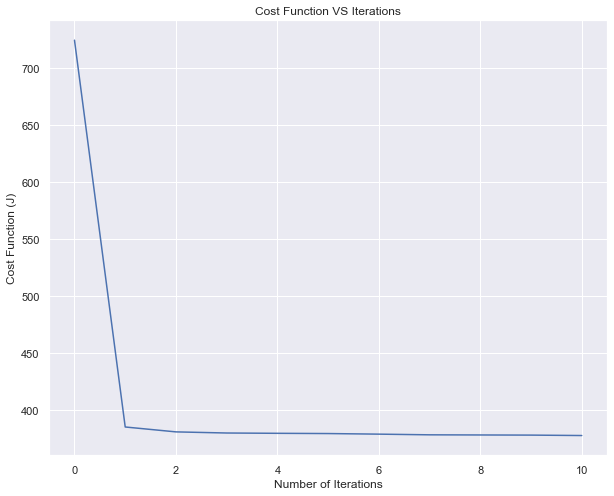

In [25]:
# Function to plot the cost function against the iterations

def redirect_wrapper(f, inp):
    old_stdout = sys.stdout
    new_stdout = io.StringIO()
    sys.stdout = new_stdout

    returned = f(inp)                #<- Call function
    printed = new_stdout.getvalue()  #<- store printed output

    sys.stdout = old_stdout
    return returned, printed


returned, printed = redirect_wrapper(ite_inertia, scaled_train_set)

#Extract inertia values
inertia = [float(i[i.find('inertia')+len('inertia')+1:]) for i in printed.split('\n')[1:-2]]

#Plot!
plt.plot(inertia);
plt.title("Cost Function VS Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Function (J)");

### Accuracy Analysis

###### Cross Tabulation of the predicted label against actual label for train_set 1 through 3

In [26]:
pd.crosstab(train_label,kmeans_scaled_train_set1, rownames=['Actual Label'], colnames=['KMeans Predicted Label 1'])

KMeans Predicted Label 1,0,1,2
Actual Label,,,
1.0,2,4,60
2.0,0,64,3
3.0,57,0,8


In [27]:
pd.crosstab(train_label,kmeans_scaled_train_set2, rownames=['Actual Label'], colnames=['KMeans Predicted Label 2'])

KMeans Predicted Label 2,0,1,2
Actual Label,,,
1.0,2,4,60
2.0,0,64,3
3.0,57,0,8


In [28]:
pd.crosstab(train_label,kmeans_scaled_train_set3, rownames=['Actual Label'], colnames=['KMeans Predicted Label 3'])

KMeans Predicted Label 3,0,1,2
Actual Label,,,
1.0,2,4,60
2.0,0,64,3
3.0,57,0,8


In [29]:
pd.crosstab(train_label,kmeans_scaled_train_set4, rownames=['Actual Label'], colnames=['KMeans Predicted Label 4'])

KMeans Predicted Label 4,0,1,2
Actual Label,,,
1.0,2,4,60
2.0,0,64,3
3.0,57,0,8


In [30]:
pd.crosstab(train_label,kmeans_scaled_train_set5, rownames=['Actual Label'], colnames=['KMeans Predicted Label 5'])

KMeans Predicted Label 5,0,1,2
Actual Label,,,
1.0,60,4,2
2.0,3,64,0
3.0,8,0,57


###### Heatmap Comparison of Predicted clusters against Actual Clusters

In [31]:
def heatmap(X,Y):
    
    # Function to plot heatmap of the predicted labels against actual labels
    
    cm = confusion_matrix(train_label, X)
    ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
    ax.set_title(f"{Y}", fontsize =15)
    plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
    plt.ylabel('Actual Label', fontsize = 15) # y-axis label with fontsize 15
    plt.show()

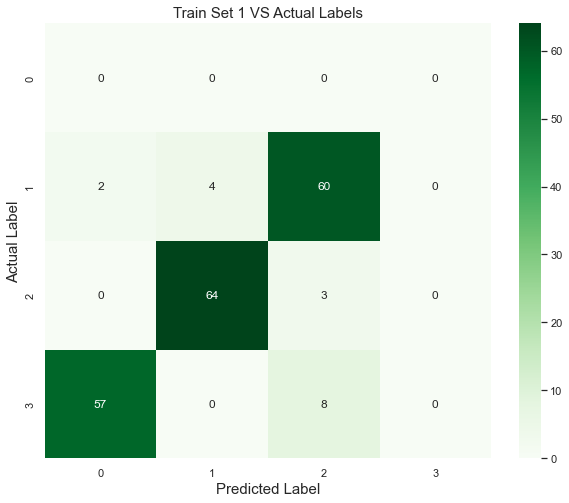

In [32]:
heatmap(kmeans_scaled_train_set1, "Train Set 1 VS Actual Labels")

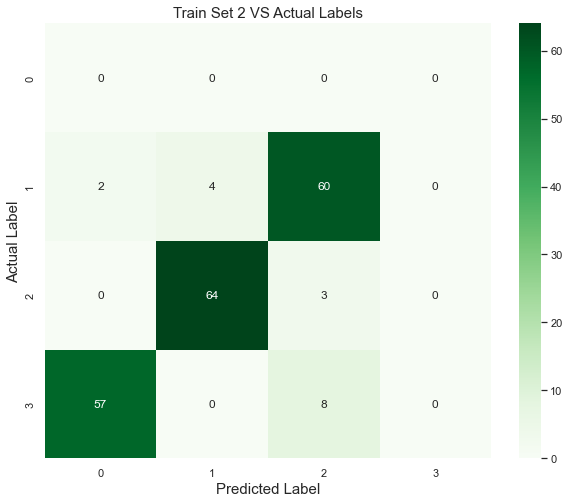

In [33]:
heatmap(kmeans_scaled_train_set2, "Train Set 2 VS Actual Labels")

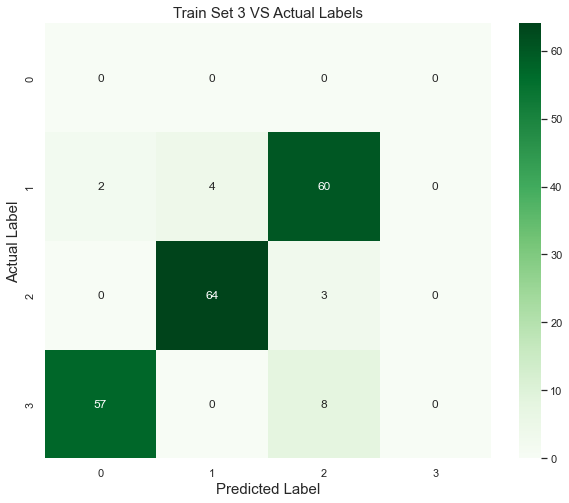

In [34]:
heatmap(kmeans_scaled_train_set3, "Train Set 3 VS Actual Labels")

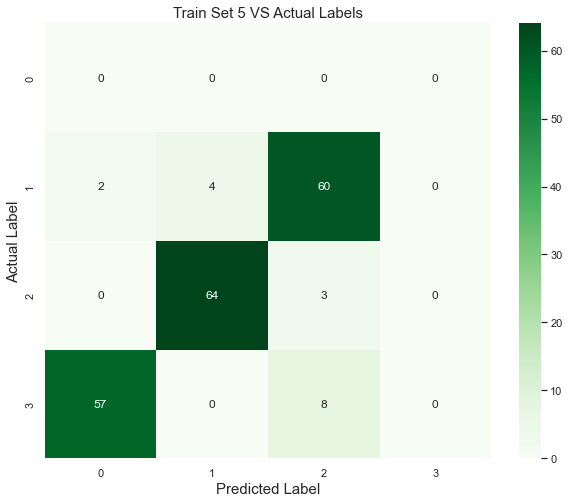

In [35]:
heatmap(kmeans_scaled_train_set4, "Train Set 5 VS Actual Labels")

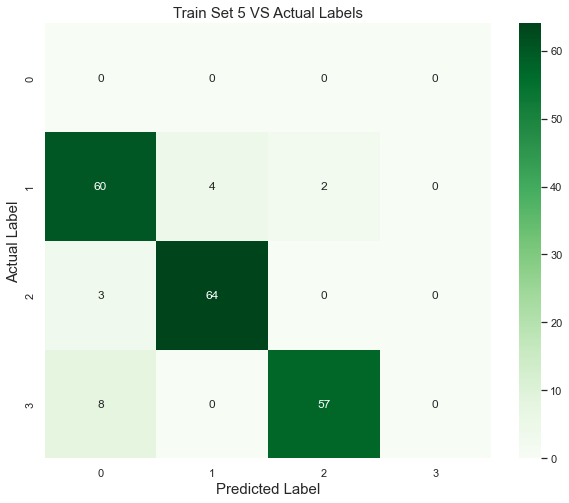

In [36]:
heatmap(kmeans_scaled_train_set5, "Train Set 5 VS Actual Labels")

### Using Principal Component Analysis To Visualise the Clusters

In [41]:
def scatter_plot(X,Y): 
    
    # Function to visualise the clusters on a scatter plot using PCA
    
    pca = PCA(n_components=2)
    pca.fit(X)
    two_com_train_set = pca.transform(X)  # saves the 2 generated components into a variable
    
    plt.scatter(two_com_train_set[:,0], two_com_train_set[:,1], s=100, c=Y, cmap=plt.cm.get_cmap("brg_r",3));

    #plt.cm.
    cbar = plt.colorbar(label="Clusters", orientation="vertical", pad=0.05, aspect=50);
    cbar.set_ticks([0,1,2])
    cbar.set_ticklabels(["Cluster 1", "Cluster 2", "Cluster 3"])
    cbar.ax.tick_params(labelsize=14)

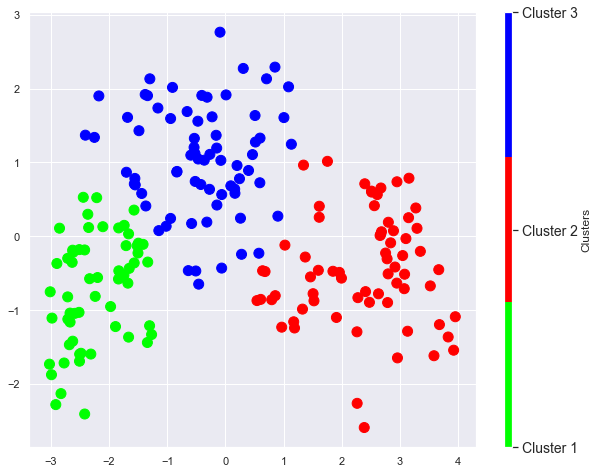

In [42]:
scatter_plot(scaled_train_set, kmeans_scaled_train_set1)

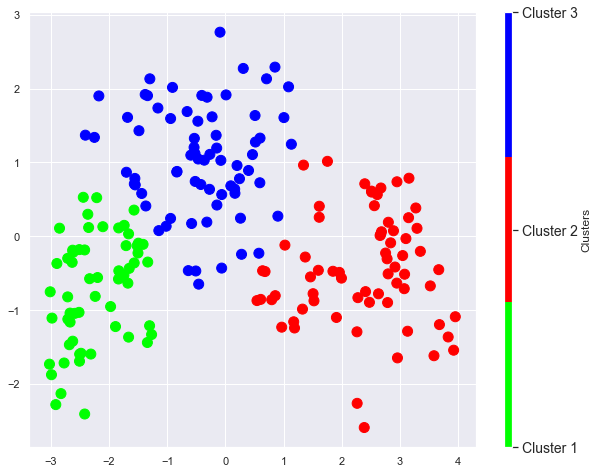

In [43]:
scatter_plot(scaled_train_set, kmeans_scaled_train_set2)

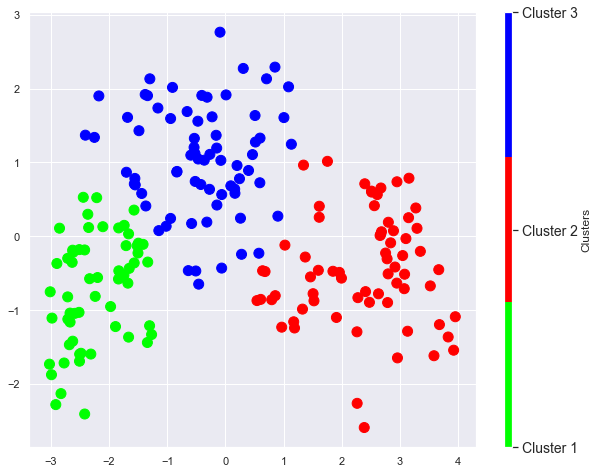

In [44]:
scatter_plot(scaled_train_set, kmeans_scaled_train_set3)

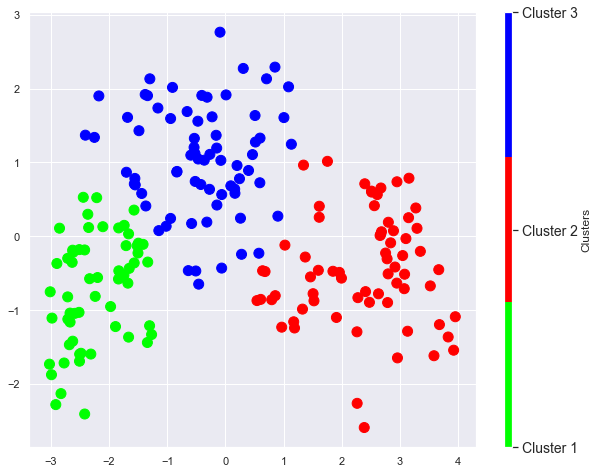

In [45]:
scatter_plot(scaled_train_set, kmeans_scaled_train_set4)

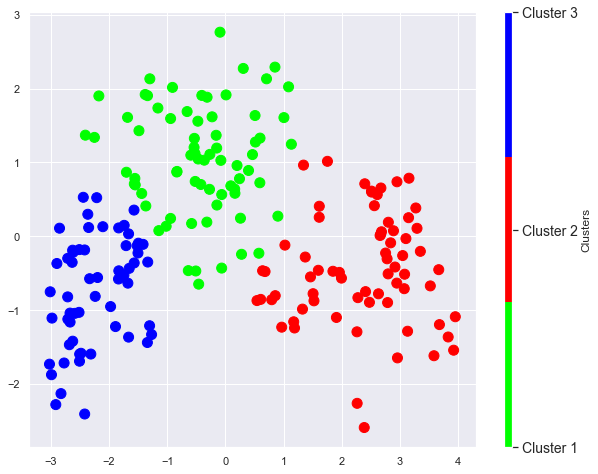

In [46]:
scatter_plot(scaled_train_set, kmeans_scaled_train_set5)

##### Accuracy Calculation Error return back to it later

In [ ]:
test.

In [ ]:
def cluster_acc(y_true, y_pred):
    """
    Calculate clustering accuracy. Require scikit-learn installed
    # Arguments
        y: true labels, numpy.array with shape `(n_samples,)`
        y_pred: predicted labels, numpy.array with shape `(n_samples,)`
    # Return
        accuracy, in [0,1]
    """
    y_true = y_true.astype(np.int64)
    assert y_pred.size == y_true.size
    D = max(y_pred.max(), y_true.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(y_pred.size):
        w[y_pred[i], y_true[i]] += 1
    ind = linear_assignment(w.max() - w)
    return sum([w[i, j] for i, j in ind]) * 1.0 / y_pred.size

In [ ]:
cluster_acc(train_label, kmeans_scaled_train_set.labels_)

In [ ]:
print(train_label)

## Feature Scaling of the Test Data

In [47]:
test_set = pd.read_excel("seeds_dataset_subset_for_HW.xlsx")
test_set.head()   # Preliminary display of data set

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Length of kerenel groove
0,13.34,13.95,0.8620,5.389,3.074,5.995,5.307
1,20.24,16.91,0.8897,6.315,3.962,5.901,6.188
2,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
3,14.79,14.52,0.8819,5.545,3.291,2.704,5.111
4,12.36,13.19,0.8923,5.076,3.042,3.220,4.605


In [48]:
test_set.describe()

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Length of kerenel groove
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,14.501667,14.400000,0.869958,5.565167,3.215167,4.367667,5.347333
std,2.971739,1.318436,0.023063,0.440495,0.381590,1.601031,0.531952
min,10.930000,12.800000,0.827400,5.046000,2.717000,2.068000,4.605000
25%,12.420000,13.542500,0.857525,5.317750,3.005750,2.875000,5.033750
50%,13.540000,14.000000,0.874700,5.451000,3.094000,4.697500,5.224000
75%,15.590000,14.855000,0.890050,5.631250,3.386250,5.523750,5.539250
max,20.240000,16.910000,0.899200,6.445000,3.962000,7.035000,6.362000


##### Using the mean normalisation method the features for the test set were scale

In [49]:
scaled_test_set = pd.read_excel("Normalised_seeds_subset_for_HW.xlsx")
scaled_test_set.head()   # Preliminary display of data set

,Normalised Area,Normalised Compaction,Normalised Length,Normalised width,Normalised Asymmetry,Normalised Length of Kerenel Groove
0,-0.390905,-0.345055,-0.399930,-0.369944,1.016428,-0.075821
1,1.930968,0.856003,1.702251,1.957161,0.957716,1.580344
2,1.173836,1.267918,0.737427,1.254836,-1.436366,0.920510
3,0.097025,0.517799,-0.045783,0.198729,-1.039122,-0.444275
4,-0.720678,0.968738,-1.110494,-0.453804,-0.716830,-1.395489


In [50]:
test_set.describe()

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Length of kerenel groove
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,14.501667,14.400000,0.869958,5.565167,3.215167,4.367667,5.347333
std,2.971739,1.318436,0.023063,0.440495,0.381590,1.601031,0.531952
min,10.930000,12.800000,0.827400,5.046000,2.717000,2.068000,4.605000
25%,12.420000,13.542500,0.857525,5.317750,3.005750,2.875000,5.033750
50%,13.540000,14.000000,0.874700,5.451000,3.094000,4.697500,5.224000
75%,15.590000,14.855000,0.890050,5.631250,3.386250,5.523750,5.539250
max,20.240000,16.910000,0.899200,6.445000,3.962000,7.035000,6.362000


### Running K Means on the Test Set

In [51]:
kmeans_scaled_test_set1 = kmeans(scaled_test_set)
kmeans_scaled_test_set1

[[ 1.53277245  0.78084667  1.47901717  1.44089992 -0.01457415  1.46943145]
 [-0.71731299 -0.98764254 -0.55248527 -0.80601431  0.74760139 -0.18673301]
 [-0.25293843  0.64896154 -0.41865855 -0.07315967 -0.92357175 -0.86865544]]
13.56703724816444


array([1, 0, 0, 2, 2, 2, 2, 0, 1, 1, 1, 1])

In [52]:
kmeans_scaled_test_set2 = kmeans(scaled_test_set)
kmeans_scaled_test_set2

[[-0.71731299 -0.98764254 -0.55248527 -0.80601431  0.74760139 -0.18673301]
 [ 1.53277245  0.78084667  1.47901717  1.44089992 -0.01457415  1.46943145]
 [-0.25293843  0.64896154 -0.41865855 -0.07315967 -0.92357175 -0.86865544]]
13.56703724816444


array([0, 1, 1, 2, 2, 2, 2, 1, 0, 0, 0, 0])

In [53]:
kmeans_scaled_test_set3 = kmeans(scaled_test_set)
kmeans_scaled_test_set3

[[-0.71731299 -0.98764254 -0.55248527 -0.80601431  0.74760139 -0.18673301]
 [ 1.53277245  0.78084667  1.47901717  1.44089992 -0.01457415  1.46943145]
 [-0.25293843  0.64896154 -0.41865855 -0.07315967 -0.92357175 -0.86865544]]
13.56703724816444


array([0, 1, 1, 2, 2, 2, 2, 1, 0, 0, 0, 0])

In [54]:
kmeans_scaled_test_set4 = kmeans(scaled_test_set)
kmeans_scaled_test_set4

[[-0.71731299 -0.98764254 -0.55248527 -0.80601431  0.74760139 -0.18673301]
 [ 1.53277245  0.78084667  1.47901717  1.44089992 -0.01457415  1.46943145]
 [-0.25293843  0.64896154 -0.41865855 -0.07315967 -0.92357175 -0.86865544]]
13.56703724816444


array([0, 1, 1, 2, 2, 2, 2, 1, 0, 0, 0, 0])

In [61]:
kmeans_scaled_test_set5 = kmeans(scaled_test_set)
kmeans_scaled_test_set5

[[-0.25293843  0.64896154 -0.41865855 -0.07315967 -0.92357175 -0.86865544]
 [ 1.53277245  0.78084667  1.47901717  1.44089992 -0.01457415  1.46943145]
 [-0.71731299 -0.98764254 -0.55248527 -0.80601431  0.74760139 -0.18673301]]
13.56703724816444


array([2, 1, 1, 0, 0, 0, 0, 1, 2, 2, 2, 2])

##### Scatter plot of the clusters for the test set

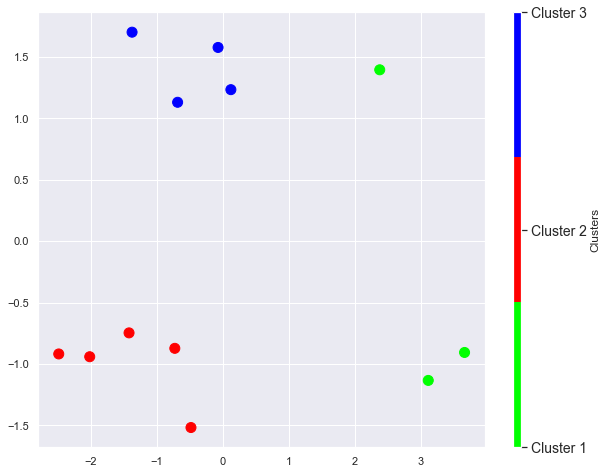

In [56]:
scatter_plot(scaled_test_set, kmeans_scaled_test_set1)

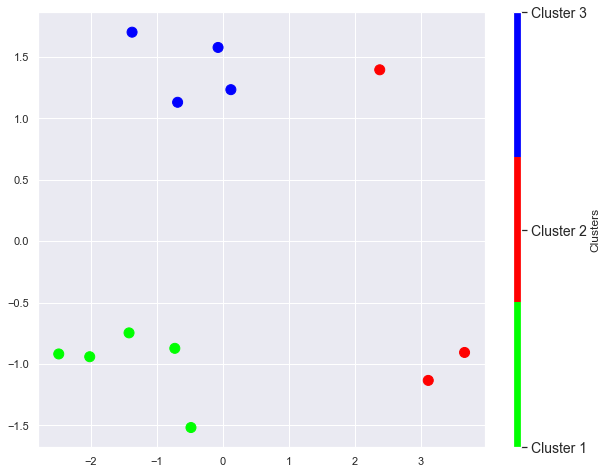

In [57]:
scatter_plot(scaled_test_set, kmeans_scaled_test_set2)

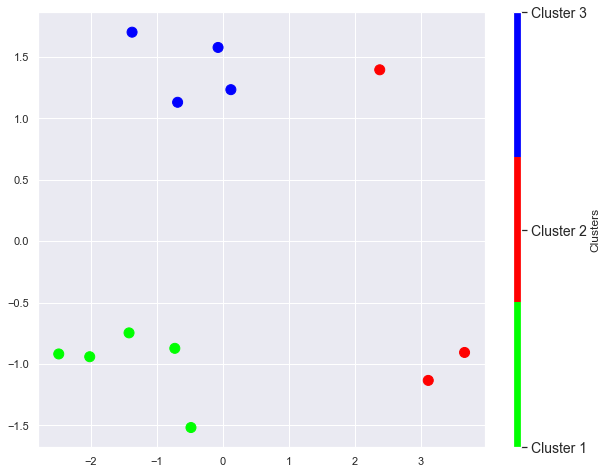

In [58]:
scatter_plot(scaled_test_set, kmeans_scaled_test_set3)

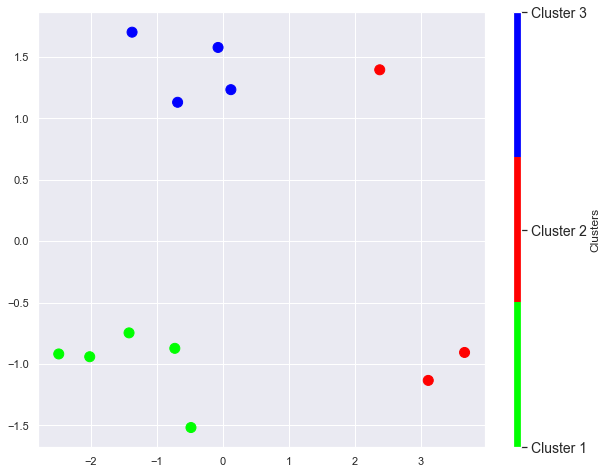

In [59]:
scatter_plot(scaled_test_set, kmeans_scaled_test_set4)

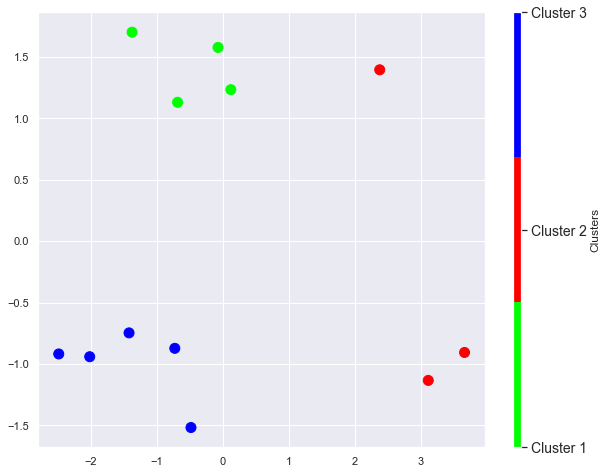

In [62]:
scatter_plot(scaled_test_set, kmeans_scaled_test_set5)

## Density Based Spatial Clustering of Applications with Noise(DBCSAN)

In [104]:
def dbscan(X,Y,Z):
    # Function to compute DBSCAN
    
    db = DBSCAN(eps=X, min_samples=Y).fit(Z)
    labels_db = db.labels_

    no_clusters = len(np.unique(labels_db) )
    no_noise = np.sum(np.array(labels_db) == -1, axis=0)

    print('Estimated no. of clusters: %d' % no_clusters)
    print('Estimated no. of noise points: %d' % no_noise)
    return labels_db

In [105]:
dbscan_scaled_train_set1 = dbscan(1.0,13,scaled_train_set)
kmeans_scaled_train_set1

Estimated no. of clusters: 3
Estimated no. of noise points: 47


array([2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 0, 1, 0, 2, 2, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1,
       2, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 2, 1, 2, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 2, 2, 2,
       0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 1, 2, 0, 1, 1, 0,
       2, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2,
       2, 2, 2, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 0, 2, 2, 1, 2, 0,
       2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 1])

In [108]:
dbscan_scaled_train_set4 = dbscan(0.5,13,scaled_train_set)
kmeans_scaled_train_set4

Estimated no. of clusters: 1
Estimated no. of noise points: 198


array([2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 0, 1, 0, 2, 2, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1,
       2, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 2, 1, 2, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 2, 2, 2,
       0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 1, 2, 0, 1, 1, 0,
       2, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2,
       2, 2, 2, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 0, 2, 2, 1, 2, 0,
       2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 1])

In [123]:

# Compute DBSCAN
db_scaled_train_set1 = DBSCAN(eps=0.5, min_samples=13).fit(scaled_train_set)
labels_db_scaled_train_set1 = db_scaled_train_set1.labels_

no_clusters = len(np.unique(labels_db_scaled_train_set1) )
no_noise = np.sum(np.array(labels_db_scaled_train_set1) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)
print(labels_db_scaled_train_set1)

Estimated no. of clusters: 1
Estimated no. of noise points: 198
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]


In [127]:

# Compute DBSCAN
db_scaled_train_set2 = DBSCAN(eps=1.0, min_samples=5).fit(scaled_train_set)
labels_db_scaled_train_set2 = db_scaled_train_set2.labels_

no_clusters = len(np.unique(labels_db_scaled_train_set2) )
no_noise = np.sum(np.array(labels_db_scaled_train_set2) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)
print(labels_db_scaled_train_set2)

Estimated no. of clusters: 3
Estimated no. of noise points: 11
[ 0  0  0 -1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  1  0
  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  1  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0
  0  0  0  0  0  0]


In [128]:
# Compute DBSCAN
db_scaled_train_set3 = DBSCAN(eps=0.9, min_samples=10).fit(scaled_train_set)
labels_db_scaled_train_set3 = db_scaled_train_set3.labels_

no_clusters = len(np.unique(labels_db_scaled_train_set3) )
no_noise = np.sum(np.array(labels_db_scaled_train_set3) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)
print(labels_db_scaled_train_set3)

Estimated no. of clusters: 3
Estimated no. of noise points: 56
[ 1  0 -1 -1  1  1  0 -1 -1  1  0  1  0  1 -1  1  0  0  1  1  0 -1  0  1
  1 -1  0  1  1 -1  1  1  0  0 -1  1 -1  0  1 -1  0  0 -1 -1  1 -1 -1  1
 -1 -1  1  0  1  0  0  1  1  1  0  1  1  1  0 -1  1 -1  1  1  1 -1  1 -1
 -1 -1  1  0  1 -1  1 -1  0  1  1 -1 -1  1  1  0  1  1  0 -1  0  0  0  1
 -1  0  1 -1  1  0  1  1  0  0  0  1  1  1  1  1 -1  1  1  0  1 -1 -1  0
  1 -1  1  1  1  0  0  1  1  0 -1  1 -1  1 -1  1  1  1 -1  1  1  1  1  1
  1 -1 -1  1  1 -1  1  1  1 -1  1  1  1 -1  1 -1 -1 -1  1  1  0  0 -1  1
  1  1  1  1  1  0  1 -1 -1  1  1  0  1  0 -1 -1 -1  0 -1  0 -1 -1  0  0
 -1  1  1  1  1  0]


In [129]:
# Compute DBSCAN
db_scaled_train_set4 = DBSCAN(eps=1.1, min_samples=15).fit(scaled_train_set)
labels_db_scaled_train_set4 = db_scaled_train_set4.labels_

no_clusters = len(np.unique(labels_db_scaled_train_set4) )
no_noise = np.sum(np.array(labels_db_scaled_train_set4) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)
print(labels_db_scaled_train_set4)

Estimated no. of clusters: 3
Estimated no. of noise points: 23
[ 0  1  0 -1  0  0  1 -1  0  0  1  0  1  0  1  0  1  1  0  0  1  1  1  0
  0 -1  1  0  0  0  0  0  1  1  1  0  0  1  0 -1  1  1 -1  0  0 -1  0  0
  0  1  0  1  0  1  1  0  0  0  1  0  0  0  1  0  0 -1  0  0  0  0  0 -1
  1  1  0  1  0  0  0  0  1  0  0  0 -1  0  0  1  0  0  1 -1  1  1  1  0
  0  1  0  1  0  1  0  0  1  1  1  0  0  0  0  0  0  0  0  1  0 -1 -1  1
  0 -1  0  0  0  1  1  0  0  1 -1  0 -1  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 -1  0  0  0 -1  0  0  0 -1  0  0  1  0  0  0  1  1 -1  0
  0  0  0  0  0  1  0  0 -1  0  0  1  0  1  0  1  0  1 -1  1 -1  1  1  1
  0  0  0  0  0  1]


In [131]:
# Compute DBSCAN
db_scaled_train_set5 = DBSCAN(eps=1.0, min_samples=15).fit(scaled_train_set)
labels_db_scaled_train_set5 = db_scaled_train_set5.labels_

no_clusters = len(np.unique(labels_db_scaled_train_set5) )
no_noise = np.sum(np.array(labels_db_scaled_train_set5) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)
print(labels_db_scaled_train_set5)

Estimated no. of clusters: 4
Estimated no. of noise points: 56
[ 1  0 -1 -1  1  1  0 -1  1  1  0  1  0  1  0  1  0  0  1  1  0 -1  0  1
  1 -1  0  1  1 -1 -1  1  2  2 -1  1 -1  0  1 -1  0  0 -1 -1  1 -1 -1  1
  1 -1  1  0  1  0  2  1  1  1  0  1  1  1  2  1  1 -1  1  1  1 -1  1 -1
 -1  2 -1  0  1  1  1  1  0  1  1 -1 -1  1  1  0  1  1  2 -1  0  0  0  1
 -1  0  1 -1  1  0  1  1  0  0  0  1 -1  1  1  1 -1 -1  1 -1  1 -1 -1  0
  1 -1  1  1  1  0 -1  1  1  0 -1  1 -1  1 -1  1  1  1 -1  1  1  1 -1 -1
  1  1 -1 -1 -1 -1  1  1  1 -1  1  1  1 -1  1  1  2 -1  1  1  0  2 -1  1
  1  1  1  1  1  0  1 -1 -1  1 -1  2  1  0 -1 -1 -1  0 -1  0 -1  2  0  2
 -1  1  1  1  1  0]


In [132]:
# Compute DBSCAN
db_scaled_train_set6 = DBSCAN(eps=0.8, min_samples=5).fit(scaled_train_set)
labels_db_scaled_train_set6 = db_scaled_train_set6.labels_

no_clusters = len(np.unique(labels_db_scaled_train_set6) )
no_noise = np.sum(np.array(labels_db_scaled_train_set6) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)
print(labels_db_scaled_train_set6)

Estimated no. of clusters: 5
Estimated no. of noise points: 46
[ 0  1  3 -1  0  0 -1 -1  0  0  1  0  1  0 -1  0  1  1  0  0  1 -1  1  0
  0 -1 -1  0  0  0  0  0  2  2 -1  0  0  1  0 -1  1  1 -1 -1  0 -1  0  0
  0 -1  0  1 -1  1  2  0  0  0  1  0  0  0  2 -1  0 -1  0  0  0 -1  0 -1
 -1  2  0  1  0 -1  0 -1  1  0  0 -1  2  0  0  1  0  0  2 -1  1  1  2  0
 -1  1  0  1  0  1  0  0  1  1  1  0  0  0  0  0 -1  0  0 -1  0 -1 -1  1
  0 -1  0  0  0  2  1  0  0  1 -1  0 -1  0 -1  0  0  0 -1  0  0  0  0  0
  0 -1 -1  0  3 -1  0  0  0 -1  0  0 -1 -1  0  0  2  0  0  0  1  2 -1  0
  0  0  0  0 -1  2  0  0 -1  0  0  2  0  1  0 -1  3  1 -1  1 -1 -1  2  2
  3  0  0  0  0  2]


In [133]:
# Compute DBSCAN
db_scaled_train_set7 = DBSCAN(eps=1.0, min_samples=3).fit(scaled_train_set)
labels_db_scaled_train_set7 = db_scaled_train_set7.labels_

no_clusters = len(np.unique(labels_db_scaled_train_set7))
no_noise = np.sum(np.array(labels_db_scaled_train_set7) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)
print(labels_db_scaled_train_set7)

Estimated no. of clusters: 2
Estimated no. of noise points: 8
[ 0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0
  0  0  0  0  0  0]


###### Visualising the clusters of DBSCAN

In [166]:
def scatter_plot2(X,Y): 
    
    # Function to visualise the clusters on a scatter plot using PCA
    
    pca = PCA(n_components=2)
    pca.fit(X)
    two_com_train_set = pca.transform(X)  # saves the 2 generated components into a variable
    
    plt.scatter(two_com_train_set[:,0], two_com_train_set[:,1], s=100, c=Y, cmap=plt.cm.get_cmap("cool",4));

    #plt.cm.
    cbar = plt.colorbar(label="Clusters", orientation="vertical", pad=0.05, aspect=50);
    cbar.set_ticks([-1,0,1,2])
    cbar.set_ticklabels(["Cluster 1", "Cluster 2", "Cluster 3", "Error"])
    cbar.ax.tick_params(labelsize=14)

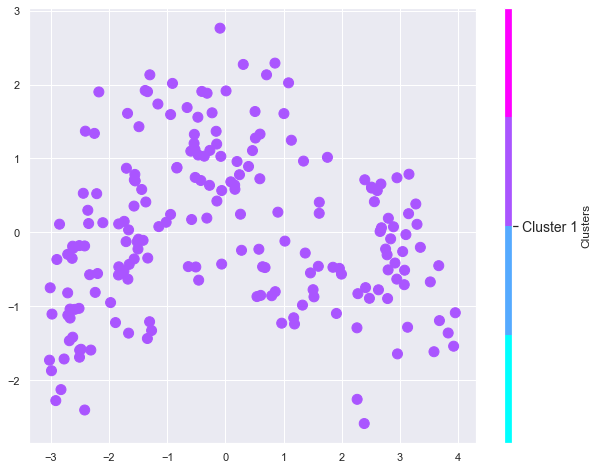

In [167]:
scatter_plot2(scaled_train_set, labels_db_scaled_train_set1)

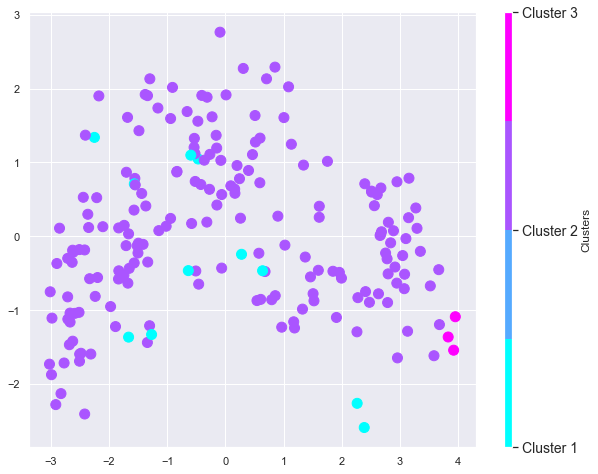

In [168]:
scatter_plot2(scaled_train_set, labels_db_scaled_train_set2)

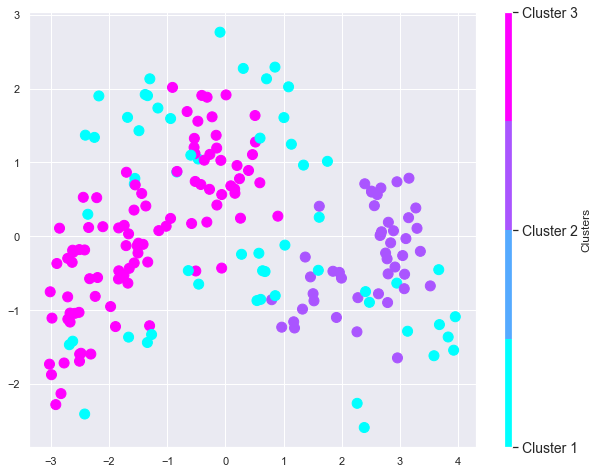

In [169]:
scatter_plot2(scaled_train_set, labels_db_scaled_train_set3)

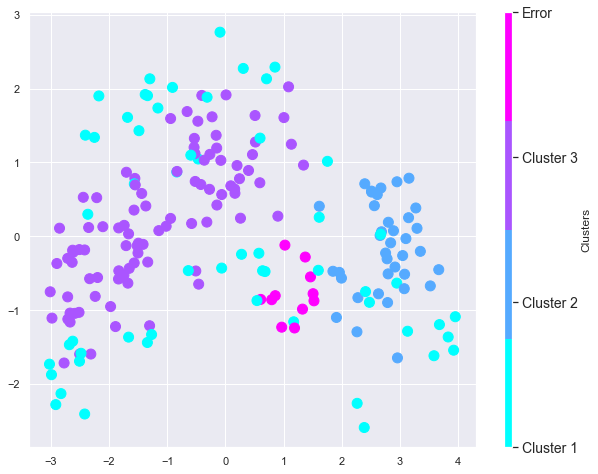

In [170]:
scatter_plot2(scaled_train_set, labels_db_scaled_train_set4)

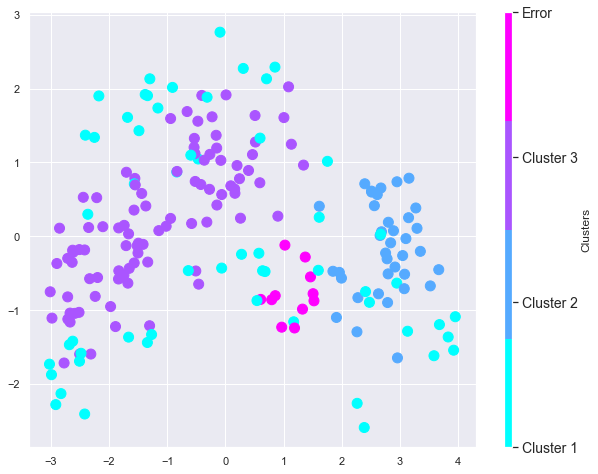

In [171]:
scatter_plot2(scaled_train_set, labels_db_scaled_train_set5)

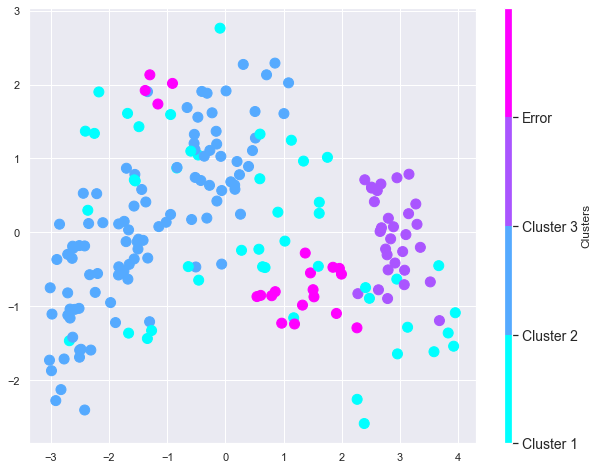

In [172]:
scatter_plot2(scaled_train_set, labels_db_scaled_train_set6)

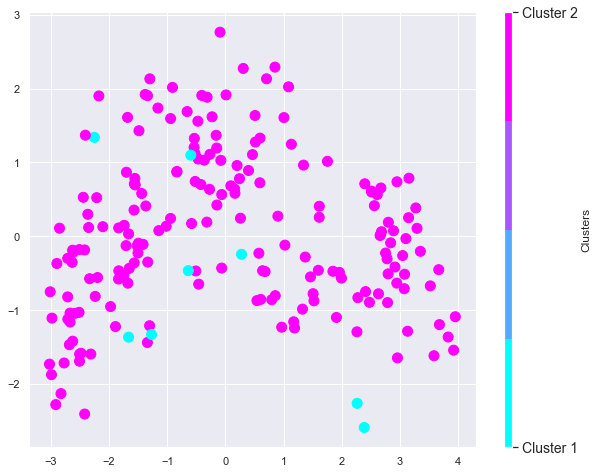

In [173]:
scatter_plot2(scaled_train_set, labels_db_scaled_train_set7)

## Mean Shift

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [207]:
def mean_shift(X,Y,Z):
    
    bandwidth = estimate_bandwidth(X, quantile=Y, n_samples=Z)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X)
    labels = ms.labels_
    print(ms.cluster_centers_)
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    print("number of estimated clusters : %d" % n_clusters_)
    
    return labels







In [208]:
Meanshift1 = mean_shift(scaled_train_set,0.2,500)
print(Meanshift1)

[[-0.60640915 -0.15022972 -0.60108789 -0.54902152 -0.17577395 -0.66669112]
 [ 1.10251827  0.58126914  1.06094213  1.04928558 -0.17669954  1.12476478]]
number of estimated clusters : 2
[0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1
 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 1 1 1 0 0 0 0 0 1]


In [209]:
Meanshift2 = mean_shift(scaled_train_set,0.1,500)
print(Meanshift2)

[[-1.00712672 -0.73329198 -0.93094075 -1.03603937  0.50040953 -0.67492287]
 [ 1.22158563  0.66407344  1.17834529  1.1650639  -0.36230969  1.24872019]
 [-0.11912508  0.28078228 -0.13490988 -0.00326994 -0.80144879 -0.53379199]
 [ 0.57142121  0.08958879  0.64569319  0.50312249  0.26305382  0.74059003]
 [-0.15399927  0.86869879 -0.44299562  0.15886145  2.14764532 -0.70883022]
 [ 1.46673848  0.04797841  1.41119586  1.2576541   2.02544937  1.30831757]
 [-0.94719932 -1.34331127 -1.06606402 -0.60597578 -1.44607707 -1.82145794]]
number of estimated clusters : 7
[2 1 2 6 0 2 1 1 6 0 1 0 1 2 1 0 1 1 0 0 1 3 1 0 2 4 1 0 2 6 3 0 3 3 1 2 2
 1 0 2 1 1 5 6 0 0 2 0 2 1 2 1 2 1 3 2 2 0 1 0 2 2 3 2 2 5 2 0 0 3 0 3 1 3
 0 1 0 2 2 2 1 0 0 2 3 0 2 1 0 2 3 3 1 1 3 2 0 1 0 1 0 1 0 2 1 1 1 2 2 2 0
 0 2 0 0 3 0 6 5 1 0 2 0 2 0 3 1 2 0 1 5 0 4 0 5 2 0 2 2 0 0 0 0 0 0 2 6 0
 2 6 0 0 0 6 2 2 3 4 0 2 3 0 0 0 1 3 1 0 2 2 0 2 0 1 0 0 4 2 0 3 2 1 2 1 2
 1 4 1 5 3 1 3 2 2 0 0 0 1]


In [210]:
Meanshift3 = mean_shift(scaled_train_set,0.17,400)
print(Meanshift3)

[[-0.54426989 -0.07856539 -0.53958747 -0.48133924 -0.30487152 -0.66760863]
 [ 1.19251789  0.6229605   1.13973322  1.13098014 -0.31685252  1.18353461]
 [-0.50653263  0.79983698 -0.81158187 -0.14337261  2.78721933 -0.8013225 ]]
number of estimated clusters : 3
[0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 2 1 0 0 0 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 0 2 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1
 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 2 1 0 1 0 1 0 0 1 1 1 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 2 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 2 0 1 1 2 0 0 1 1 1 0 0 0 2 0 0 1 0 2 2 0 0 1 0 1 0 1 0
 1 2 1 1 1 1 1 0 0 0 0 0 1]


In [211]:
Meanshift4 = mean_shift(scaled_train_set,0.18,400)
print(Meanshift4)

[[-0.51957449 -0.01460884 -0.53454745 -0.44044389 -0.31474816 -0.67830279]
 [ 1.10784385  0.62306103  1.03540593  1.07622216 -0.14729624  1.10833179]]
number of estimated clusters : 2
[0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1
 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 1 1 1 0 0 0 0 0 1]


In [212]:
Meanshift5 = mean_shift(scaled_train_set,0.15,300)
print(Meanshift5)

[[-0.49533894 -0.09286555 -0.46957495 -0.45162537 -0.40702611 -0.62281609]
 [ 0.27607997  0.15357079  0.32826478  0.2855266  -0.19570612  0.23555242]
 [ 1.24442207  0.61861308  1.21411491  1.15812526 -0.39210394  1.27073863]
 [-0.50653263  0.79983698 -0.81158187 -0.14337261  2.78721933 -0.8013225 ]]
number of estimated clusters : 4
[0 2 0 0 0 0 1 2 0 0 2 0 2 0 2 0 2 2 0 0 2 1 2 3 1 3 2 0 0 0 1 0 1 1 2 0 0
 2 0 0 2 2 2 0 0 3 1 0 1 2 0 2 1 2 1 1 1 0 2 0 0 0 1 0 1 2 1 0 0 1 0 1 2 1
 0 2 0 1 0 1 2 0 0 0 1 0 0 2 0 0 1 1 2 2 2 1 3 2 0 2 0 2 0 0 2 2 2 1 0 1 0
 0 0 0 0 1 0 0 2 2 0 1 0 1 0 2 2 1 0 2 2 0 1 0 2 0 0 0 0 0 0 0 3 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 3 0 1 1 3 0 0 2 1 2 0 0 0 3 0 0 2 0 3 3 0 0 1 0 2 1 2 0
 2 3 2 2 1 2 2 0 0 0 0 0 2]


In [213]:
Meanshift6 = mean_shift(scaled_train_set,0.15,500)
print(Meanshift6)

[[-0.49533894 -0.09286555 -0.46957495 -0.45162537 -0.40702611 -0.62281609]
 [ 0.27607997  0.15357079  0.32826478  0.2855266  -0.19570612  0.23555242]
 [ 1.24442207  0.61861308  1.21411491  1.15812526 -0.39210394  1.27073863]
 [-0.50653263  0.79983698 -0.81158187 -0.14337261  2.78721933 -0.8013225 ]]
number of estimated clusters : 4
[0 2 0 0 0 0 1 2 0 0 2 0 2 0 2 0 2 2 0 0 2 1 2 3 1 3 2 0 0 0 1 0 1 1 2 0 0
 2 0 0 2 2 2 0 0 3 1 0 1 2 0 2 1 2 1 1 1 0 2 0 0 0 1 0 1 2 1 0 0 1 0 1 2 1
 0 2 0 1 0 1 2 0 0 0 1 0 0 2 0 0 1 1 2 2 2 1 3 2 0 2 0 2 0 0 2 2 2 1 0 1 0
 0 0 0 0 1 0 0 2 2 0 1 0 1 0 2 2 1 0 2 2 0 1 0 2 0 0 0 0 0 0 0 3 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 3 0 1 1 3 0 0 2 1 2 0 0 0 3 0 0 2 0 3 3 0 0 1 0 2 1 2 0
 2 3 2 2 1 2 2 0 0 0 0 0 2]


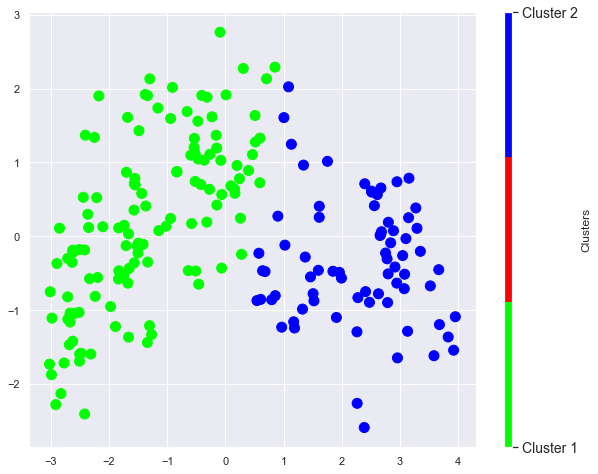

In [215]:
scatter_plot(scaled_train_set, Meanshift1)

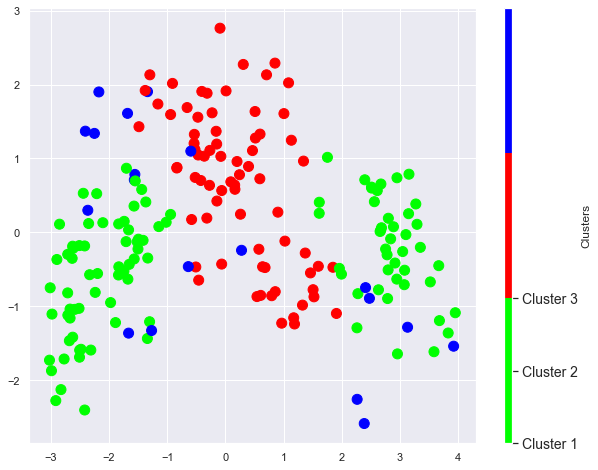

In [216]:
scatter_plot(scaled_train_set, Meanshift2)

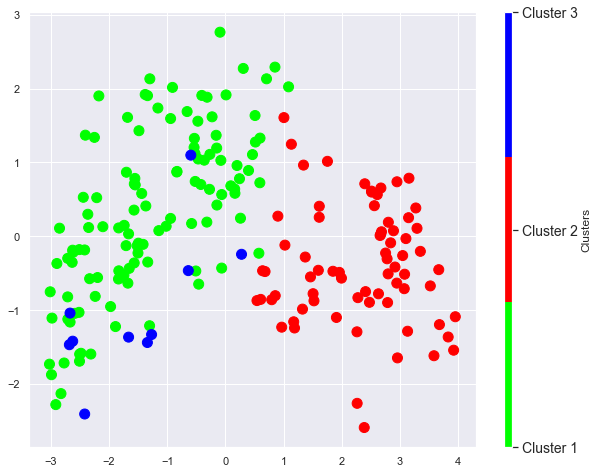

In [217]:
scatter_plot(scaled_train_set, Meanshift3)

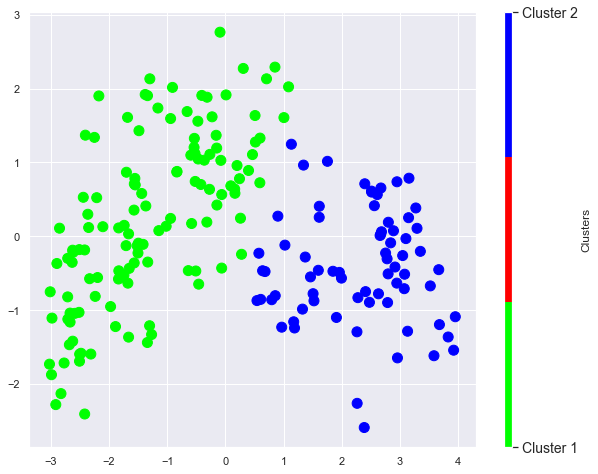

In [218]:
scatter_plot(scaled_train_set, Meanshift4)

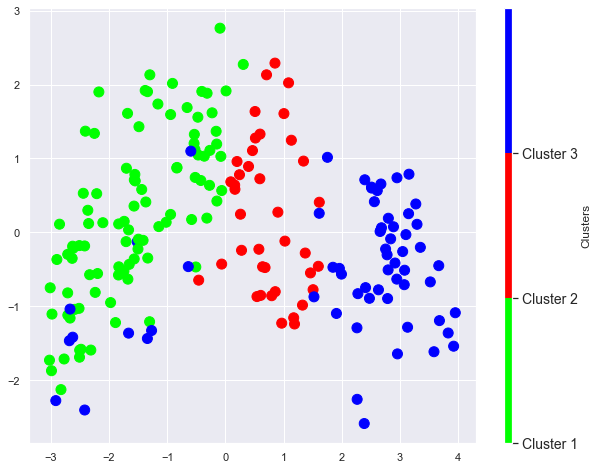

In [219]:
scatter_plot(scaled_train_set, Meanshift5)

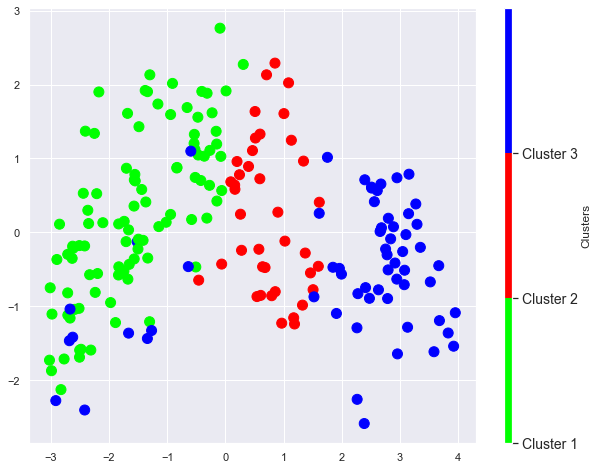

In [220]:
scatter_plot(scaled_train_set, Meanshift6)